## bitslicing representation

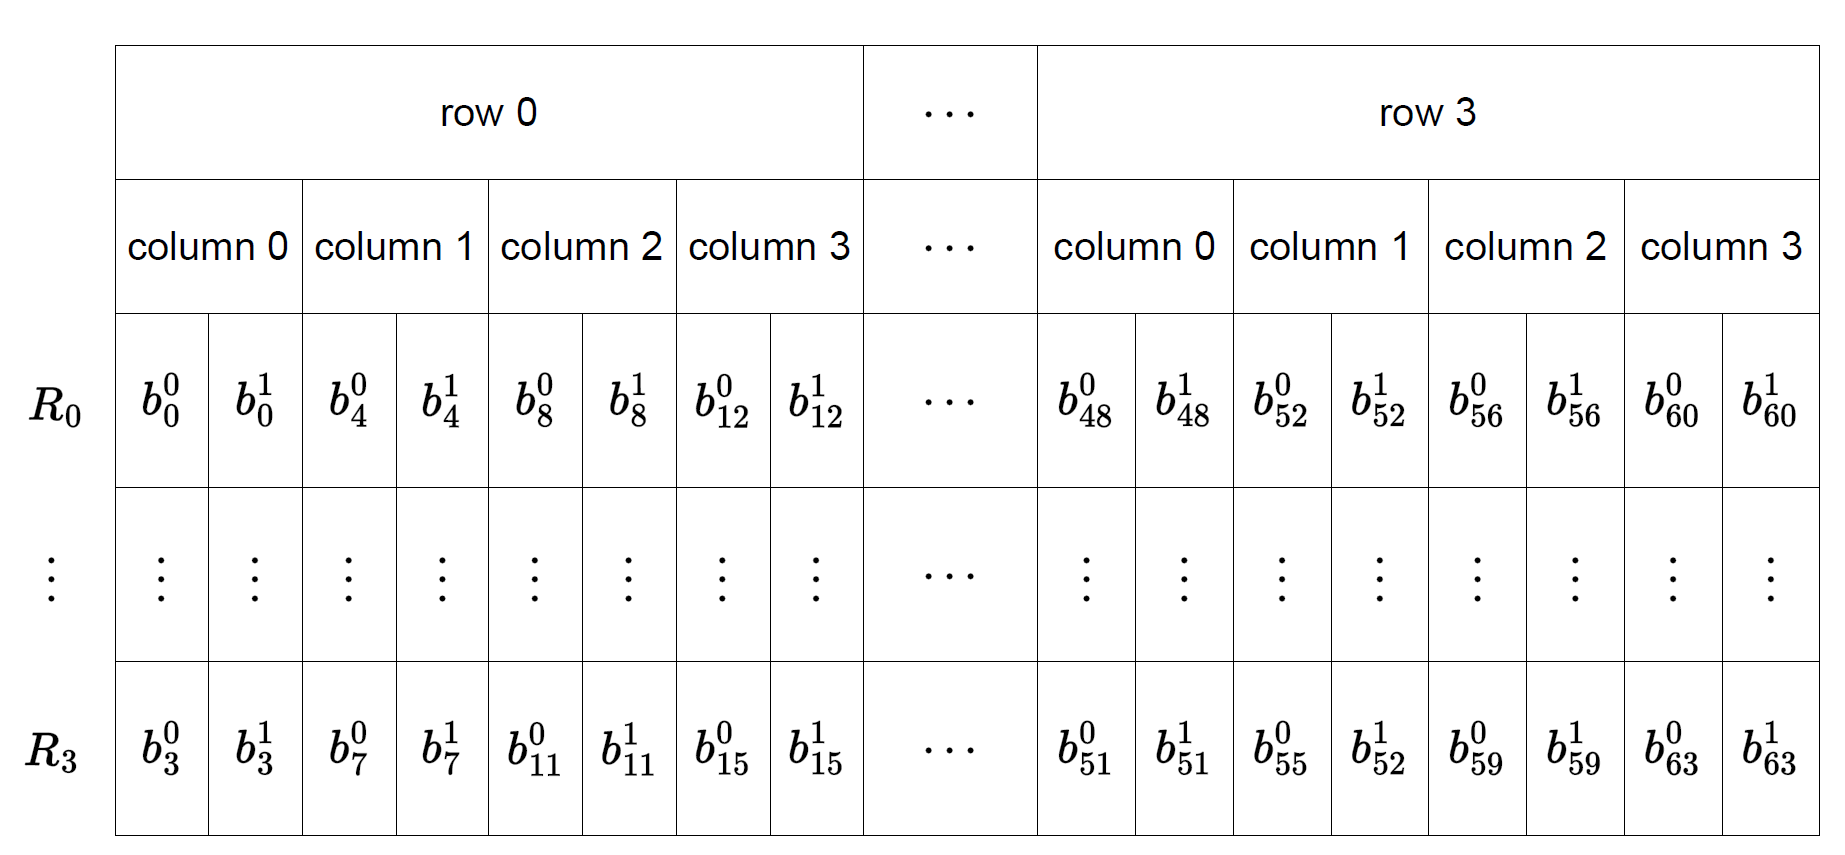

In [69]:
def integer_to_bitslicing(b0, b1):
    b0_b = bin(b0)[2:].zfill(64)
    b1_b = bin(b1)[2:].zfill(64)
    R0_b = ""
    R1_b = ""
    R2_b = ""
    R3_b = ""
    for i in range(0, len(b0_b), 4):
        R0_b += b0_b[i]
        R0_b += b1_b[i]

        R1_b += b0_b[i + 1]
        R1_b += b1_b[i + 1]

        R2_b += b0_b[i + 2]
        R2_b += b1_b[i + 2]

        R3_b += b0_b[i + 3]
        R3_b += b1_b[i + 3]

    return int(R0_b, 2), int(R1_b, 2), int(R2_b, 2), int(R3_b, 2)

b0 = 0x88_88_44_44_22_22_11_11
b1 = 0x88_88_44_44_22_22_11_11
R0, R1, R2, R3 = integer_to_bitslicing(b0, b1)
if R0 == 0xff000000 and R1 == 0xff0000 and R2 == 0xff00 and R3 == 0xff:
    print("Correct")

Correct


In [70]:
def bitslicing_to_integer(R0, R1, R2, R3):
    R0_b = bin(R0)[2:].zfill(32)
    R1_b = bin(R1)[2:].zfill(32)
    R2_b = bin(R2)[2:].zfill(32)
    R3_b = bin(R3)[2:].zfill(32)
    b0_b = ""
    b1_b = ""
    for i in range(0, len(R0_b), 2):
        b0_b += R0_b[i]
        b0_b += R1_b[i]
        b0_b += R2_b[i]
        b0_b += R3_b[i]

        b1_b += R0_b[i + 1]
        b1_b += R1_b[i + 1]
        b1_b += R2_b[i + 1]
        b1_b += R3_b[i + 1]

    return int(b0_b, 2), int(b1_b, 2)

b0 = 0x88_88_44_44_22_22_11_11
b1 = 0x88_88_44_44_22_22_11_11
R0, R1, R2, R3 = integer_to_bitslicing(b0, b1)
b0_new, b1_new = bitslicing_to_integer(R0, R1, R2, R3)
if b0 == b0_new and b1 == b1_new:
    print("Correct")

Correct


## permutation

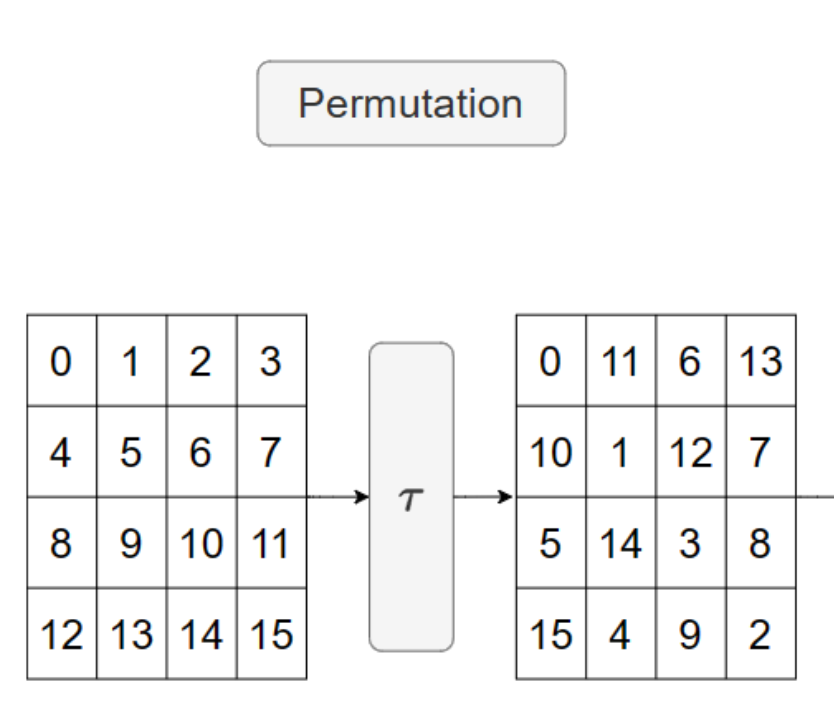

In [71]:
def right_cyclic_shift(n, bits, shift_amount):
    return ((n >> shift_amount) | (n << (bits - shift_amount))) & ((1 << bits) - 1)


def left_cyclic_shift(n, bits, shift_amount):
    return ((n << shift_amount) | (n >> (bits - shift_amount))) & ((1 << bits) - 1)

In [72]:

b0 = 0x01_23_45_67_89_AB_CD_EF
b1 = 0x01_23_45_67_89_AB_CD_EF
R0, R1, R2, R3 = integer_to_bitslicing(b0, b1)
tau = [0, 11, 6, 13, 10, 1, 12, 7, 5, 14, 3, 8, 15, 4, 9, 2]
tau_inverse = [tau.index(i) for i in range(len(tau))]
tau_f = [1, 10, 14, 6, 2, 9, 13, 5, 0, 8, 12, 4, 3, 11, 15, 7]
tau_f_inverse = [tau_f.index(i) for i in range(len(tau_f))]
print(f'tau_f_inverse {tau_f_inverse}')
shift = [i - tau[i] if i - tau[i] >= 0 else i - tau[i] + 16 for i in range(16)]
print(shift)

def permutation_bitslicing_shift(R0, R1, R2, R3, p):
    shift = [i - p[i] if i - p[i] >= 0 else i - p[i] + 16 for i in range(16)]
    shift_number = []
    shift_mask =[]
    r0 = 0
    r1 = 0
    r2 = 0
    r3 = 0
    for i in range(16):
        shift_number.append(shift[i] * 2)
        shift_mask.append(hex(3 << ((15 - i) * 2)))
        r0 |= (right_cyclic_shift(R0, 32, shift[i] * 2)) & (3 << ((15 - i) * 2))
        r1 |= (right_cyclic_shift(R1, 32, shift[i] * 2)) & (3 << ((15 - i) * 2))
        r2 |= (right_cyclic_shift(R2, 32, shift[i] * 2)) & (3 << ((15 - i) * 2))
        r3 |= (right_cyclic_shift(R3, 32, shift[i] * 2)) & (3 << ((15 - i) * 2))
    print(shift_number)
    print(shift_mask)
    return r0, r1, r2, r3

def permutation_bitslicing(R0, R1, R2, R3, p):
    shift = [i - p[i] if i - p[i] >= 0 else i - p[i] + 16 for i in range(16)]
    r0 = 0
    r1 = 0
    r2 = 0
    r3 = 0
    for i in range(16):
        r0 |= (right_cyclic_shift(R0, 32, shift[i] * 2)) & (3 << ((15 - i) * 2))
        r1 |= (right_cyclic_shift(R1, 32, shift[i] * 2)) & (3 << ((15 - i) * 2))
        r2 |= (right_cyclic_shift(R2, 32, shift[i] * 2)) & (3 << ((15 - i) * 2))
        r3 |= (right_cyclic_shift(R3, 32, shift[i] * 2)) & (3 << ((15 - i) * 2))
    return r0, r1, r2, r3

print(f'hex: {hex(R0)} {hex(R1)} {hex(R2)} {hex(R3)}')
R0,R1,R2,R3 = 0xcc3fffff,0xff33f3cf,0x3f0c33f3,0x3c303c33
R0, R1, R2, R3 = permutation_bitslicing_shift(R0, R1, R2, R3, tau_inverse)
print(f'hex: {hex(R0)} {hex(R1)} {hex(R2)} {hex(R3)}')
b0_new, b1_new = bitslicing_to_integer(R0, R1, R2, R3)
# if b0_new == 0x0B6D_A1C7_5E38_F492 and b1_new == 0x0B6D_A1C7_5E38_F492:
#     print("Correct")

tau_f_inverse [8, 0, 4, 12, 11, 7, 3, 15, 9, 5, 1, 13, 10, 6, 2, 14]
[0, 6, 12, 6, 10, 4, 10, 0, 3, 11, 7, 3, 13, 9, 5, 13]
hex: 0xffff 0xff00ff 0xf0f0f0f 0x33333333
[0, 24, 6, 18, 14, 26, 8, 0, 26, 22, 12, 20, 12, 20, 10, 6]
['0xc0000000', '0x30000000', '0xc000000', '0x3000000', '0xc00000', '0x300000', '0xc0000', '0x30000', '0xc000', '0x3000', '0xc00', '0x300', '0xc0', '0x30', '0xc', '0x3']
hex: 0xfffff0cf 0xfc3ff33f 0xcccc3ff 0x3fcc030c


## Diffusion Matrix


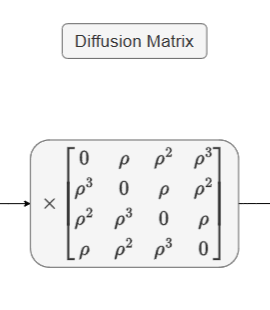

$\rho((x_3,x_2,x_1,x_0))=(x_2,x_1,x_0,x_3)$

In [73]:
def diffusion_matrix(R0, R1, R2, R3):
    r0 = 0
    r1 = 0
    r2 = 0
    r3 = 0
    r0 |= (
        left_cyclic_shift(R1, 32, 4 * 2)
        ^ left_cyclic_shift(R2, 32, 8 * 2)
        ^ left_cyclic_shift(R3, 32, 12 * 2)
    )
    r1 |= (
        left_cyclic_shift(R2, 32, 4 * 2)
        ^ left_cyclic_shift(R3, 32, 8 * 2)
        ^ left_cyclic_shift(R0, 32, 12 * 2)
    )
    r2 |= (
        left_cyclic_shift(R3, 32, 4 * 2)
        ^ left_cyclic_shift(R0, 32, 8 * 2)
        ^ left_cyclic_shift(R1, 32, 12 * 2)
    )
    r3 |= (
        left_cyclic_shift(R0, 32, 4 * 2)
        ^ left_cyclic_shift(R1, 32, 8 * 2)
        ^ left_cyclic_shift(R2, 32, 12 * 2)
    )
    return r0, r1, r2, r3

b0 = 0x01_23_45_67_89_AB_CD_EF
b1 = 0x01_23_45_67_89_AB_CD_EF
R0, R1, R2, R3 = integer_to_bitslicing(b0, b1)
print(f'hex: {hex(R0)} {hex(R1)} {hex(R2)} {hex(R3)}')
R0, R1, R2, R3 = diffusion_matrix(R0, R1, R2, R3)
print(f'hex: {hex(R0)} {hex(R1)} {hex(R2)} {hex(R3)}')
b0_new, b1_new = bitslicing_to_integer(R0, R1, R2, R3)

if b0_new == 0xc21f2cf1b5685b86  and b1_new == 0xc21f2cf1b5685b86 :
    print("Correct")

hex: 0xffff 0xff00ff 0xf0f0f0f 0x33333333
hex: 0xc33cc33c 0xc33c3cc3 0x33cccc33 0xf0ff0f0
Correct


## Sbox

$$\begin{align}
    T_{0}  & =  X_{2} \oplus X_{3}  & T_{1}  & = \sim T_{0}           & T_{2}  & =  T_{1} \lor X_{0}   \nonumber       \\
    T_{3}  & =  T_{2} \oplus X_{3}  & T_{4}  & =  T_{3} \lor X_{1}    & T_{5}  & =  X_{0} \oplus T_{4} \nonumber       \\
    T_{6}  & =  X_{1} \oplus T_{0}  & T_{7}  & =  T_{1} \oplus T_{3}  & T_{8}  & =  X_{2} \lor T_{7}    \nonumber      \\
    T_{9}  & =  T_{8} \oplus T_{3}  & T_{10} & =  T_{6} \lor T_{8}    & T_{11} & =  T_{10} \lor X_{1}        \tag{1}          \\
    T_{12} & =  T_{11} \land T_{9}  & T_{13} & =  X_{1} \oplus T_{10} & T_{14} & =  T_{1} \oplus T_{0}       \nonumber \\
    T_{15} & =  T_{0} \oplus T_{5}  & T_{16} & =  T_{13} \land T_{15} & T_{17} & =  X_{3} \land T_{15}       \nonumber \\
    T_{18} & =  T_{16} \oplus T_{8} & T_{19} & =  T_{13} \lor T_{17}  & Y_{0}  & = T_{12}                 \nonumber    \\
    Y_{1}  & = T_{5}                & Y_{2}  & = T_{18}               & Y_{3}  & = T_{19} \nonumber
\end{align}
$$

In [74]:
# the sbox_bit is correct
# sbox = [4, 7, 9, 11, 12, 6, 14, 15, 0, 5, 1, 13, 8, 3, 2, 10]
def sbox_bit(R0, R1, R2, R3):
    r0, r1, r2, r3 = 0, 0, 0, 0
    T = [0] * 20
    T[0] = R2 ^ R3
    T[1] = T[0] ^ 0x1
    T[2] = T[1] | R0
    T[3] = T[2] ^ R3
    T[4] = T[3] | R1
    T[5] = R0 ^ T[4]
    T[6] = R1 ^ T[0]
    T[7] = T[1] ^ T[3]
    T[8] = R2 | T[7]
    T[9] = T[8] ^ T[3]
    T[10] = T[6] | T[8]
    T[11] = T[10] | R1
    T[12] = T[11] & T[9]
    T[13] = R1 ^ T[10]
    T[14] = T[1] ^ T[0]
    T[15] = T[0] ^ T[5]
    T[16] = T[13] & T[15]
    T[17] = R3 & T[15]
    T[18] = T[16] ^ T[8]
    T[19] = T[13] | T[17]
    r0 = T[12]
    r1 = T[5]
    r2 = T[18]
    r3 = T[19]

    return r0, r1, r2, r3


def split_and_merge(i):
    # Split i into four bits
    R0 = (i >> 3) & 1
    R1 = (i >> 2) & 1
    R2 = (i >> 1) & 1
    R3 = i & 1

    # Call sbox_bit on the bits
    r0, r1, r2, r3 = sbox_bit(R0, R1, R2, R3)

    # Merge the results back into an integer
    result = (r0 << 3) | (r1 << 2) | (r2 << 1) | r3

    return result


sbox = [4, 7, 9, 11, 12, 6, 14, 15, 0, 5, 1, 13, 8, 3, 2, 10]
for i in range(16):
    result = split_and_merge(i)
    assert result == sbox[i]

In [75]:
def sbox(R0, R1, R2, R3):
    r0, r1, r2, r3 = 0, 0, 0, 0
    T = [0] * 20
    T[0] = R2 ^ R3
    T[1] = T[0] ^ 0xFFFF_FFFF
    T[2] = T[1] | R0
    T[3] = T[2] ^ R3
    T[4] = T[3] | R1
    T[5] = R0 ^ T[4]
    T[6] = R1 ^ T[0]
    T[7] = T[1] ^ T[3]
    T[8] = R2 | T[7]
    T[9] = T[8] ^ T[3]
    T[10] = T[6] | T[8]
    T[11] = T[10] | R1
    T[12] = T[11] & T[9]
    T[13] = R1 ^ T[10]
    T[14] = T[1] ^ T[0]
    T[15] = T[0] ^ T[5]
    T[16] = T[13] & T[15]
    T[17] = R3 & T[15]
    T[18] = T[16] ^ T[8]
    T[19] = T[13] | T[17]
    r0 = T[12]
    r1 = T[5]
    r2 = T[18]
    r3 = T[19]

    return r0, r1, r2, r3


b0 = 0x0123_4567_89ab_cdef
b1 = 0x0123_4567_89ab_cdef
R0, R1, R2, R3 = integer_to_bitslicing(b0, b1)
print(f'hex: {hex(R0)} {hex(R1)} {hex(R2)} {hex(R3)}')
r0, r1, r2, r3 = sbox(R0, R1, R2, R3)
print(f'hex: {hex(r0)} {hex(r1)} {hex(r2)} {hex(r3)}')
b0_new, b1_new = bitslicing_to_integer(r0, r1, r2, r3)
print(hex(b0_new), hex(b1_new))

hex: 0xffff 0xff00ff 0xf0f0f0f 0x33333333
hex: 0xfcf03c3 0xf0ff3300 0x333f003f 0x3f033f30
0x479bc6ef051d832a 0x479bc6ef051d832a


### inverse Sbox

$$\begin{align}
    T_{0}  & =  X_{2} \land X_{1}  & T_{1}  & =  X_{0} \oplus X_{1}  & T_{2}  & =  X_{2} \lor X_{0}   \nonumber       \\
    T_{3}  & =  X_{0} \oplus T_{0}  & T_{4}  & =  X_{1} \lor X_{2}    & T_{5}  & =  X_{3} \land T_{3} \nonumber       \\
    T_{6}  & = \sim X_{1}           & T_{7}  & =  T_{5} \lor X_{1}    & T_{8}  & =  T_{1} \lor X_{3}    \nonumber      \\
    T_{9}  & =  X_{3} \lor X_{2}    & T_{10} & =  T_{9} \land T_{4}   & T_{11} & =  T_{6} \oplus T_{7}         \tag{2}           \\
    T_{12} & =  T_{4} \oplus T_{8}  & T_{13} & =  T_{2} \oplus T_{5}  & T_{14} & =  T_{12} \lor X_{0}       \nonumber \\
    T_{15} & =  T_{14} \land T_{9}  & T_{16} & =  T_{11} \oplus T_{0} & T_{17} & =  T_{10} \land T_{8}       \nonumber \\
    T_{18} & =  T_{6} \lor T_{17}   & T_{19} & =  T_{16} \land T_{18} & Y_{0}  & = T_{19}                 \nonumber    \\
    Y_{1}  & = T_{13}               & Y_{2}  & = T_{15}              & Y_{3}  & = T_{17} \nonumber
\end{align}$$

In [76]:
def sbox_inverse(R0, R1, R2, R3):
    T = [0] * 20
    T[0] = R2 & R1
    T[1] = R0 ^ R1
    T[2] = R2 | R0
    T[3] = R0 ^ T[0]
    T[4] = R1 | R2
    T[5] = R3 & T[3]
    T[6] = R1 ^ 0xFFFF_FFFF
    T[7] = T[5] | R1
    T[8] = T[1] | R3
    T[9] = R3 | R2
    T[10] = T[9] & T[4]
    T[11] = T[6] ^ T[7]
    T[12] = T[4] ^ T[8]
    T[13] = T[2] ^ T[5]
    T[14] = T[12] | R0
    T[15] = T[14] & T[9]
    T[16] = T[11] ^ T[0]
    T[17] = T[10] & T[8]
    T[18] = T[6] | T[17]
    T[19] = T[16] & T[18]
    r0 = T[19]
    r1 = T[13]
    r2 = T[15]
    r3 = T[17]

    return r0, r1, r2, r3


b0 = 0x0123_4567_89AB_CDEF
b1 = 0x0123_4567_89AB_CDEF
R0, R1, R2, R3 = integer_to_bitslicing(b0, b1)
print(f'hex: {hex(R0)} {hex(R1)} {hex(R2)} {hex(R3)}')
# R0, R1, R2, R3 = sbox(R0, R1, R2, R3)
r0, r1, r2, r3 = sbox_inverse(R0, R1, R2, R3)
print(f'hex: {hex(r0)} {hex(r1)} {hex(r2)} {hex(r3)}')
b0_new, b1_new = bitslicing_to_integer(r0, r1, r2, r3)
# if b0_new == b0 and b1_new == b1:
#     print("Correct")

hex: 0xffff 0xff00ff 0xf0f0f0f 0x33333333
hex: 0xff30cc30 0xf0ccccf 0x3c003f3f 0x33f0f33


## Encryption

[encryption detail](qarmav2.ipynb)

In [80]:
# need a function to transform the inter xor operation to bitslicing
def xor_int_bitslicing(R0, R1, R2, R3, integer):
    R0_, R1_, R2_, R3_ = integer_to_bitslicing(integer, integer)
    return R0 ^ R0_, R1 ^ R1_, R2 ^ R2_, R3 ^ R3_

def int_bitslicing_print(integer, name):
    t0,t1,t2,t4 = integer_to_bitslicing(integer, integer)
    print(f'{name}: , {hex(t0)}, {hex(t1)}, {hex(t2)}, {hex(t4)}')

In [89]:

from qarmav2 import *

# constants for the qarmav2 cipher
tau_f = [1, 10, 14, 6, 2, 9, 13, 5, 0, 8, 12, 4, 3, 11, 15, 7]
tau_f_inverse = [tau_f.index(i) for i in range(len(tau_f))]
c2 = 0x243F_6A88_85A3_08D3
tau = [0, 11, 6, 13, 10, 1, 12, 7, 5, 14, 3, 8, 15, 4, 9, 2]
tau_inverse = [tau.index(i) for i in range(len(tau))]
alpha = 0x13198A2E03707344
beta = psi_func(alpha)

# input data
P = 0x0000000000000000
K0, K1 = 0x0123456789ABCDEF, 0xFEDCBA9876543210
T0, T1 = 0x7E5C3A18F6D4B290, 0x1EB852FC9630DA74
W0 = o_func(o_func(K0, 64), 64)
W1 = o_func_inverse(o_func_inverse(K1, 64), 64)

# cipher of r = 5
r = 5

# pre computation some constants
T0 = int_to_4bit_list(T0)
for i in range(r - 1):
    T0 = permutation(T0, tau_f)
T0 = bit_list_to_int(T0)

cs = [0, 0, c2]
for i in range(3, r + 1):
    cs.append(psi_func(cs[-1]))

t0, t1 = T0, T1
k0, k1 = K0, K1

# start the encryption
# white key addition
r0, r1, r2, r3 = integer_to_bitslicing(P, P)
print(f'start point: {hex(r0)} {hex(r1)} {hex(r2)} {hex(r3)}')
r0, r1, r2, r3 = xor_int_bitslicing(r0, r1, r2, r3, k0)
int_bitslicing_print(k0, 'k0')
print(f'start xor k0: {hex(r0)} {hex(r1)} {hex(r2)} {hex(r3)}')
r0, r1, r2, r3 = sbox(r0, r1, r2, r3)
print(f'start sbox: {hex(r0)} {hex(r1)} {hex(r2)} {hex(r3)}')
# forwards part
for i in range(1, r + 1):
    if i % 2 == 1:
        r0, r1, r2, r3 = xor_int_bitslicing(r0, r1, r2, r3, k1 ^ t1 ^ cs[i])
        int_bitslicing_print(k1 ^ t1 ^cs[i], f'ks {i}')
    else:
        r0, r1, r2, r3 = xor_int_bitslicing(r0, r1, r2, r3, k0 ^ t0 ^ cs[i])
        int_bitslicing_print(k0 ^ t0 ^ cs[i], f'ks {i}')
    print(f'b per {i}: {hex(r0)} {hex(r1)} {hex(r2)} {hex(r3)}')
    r0, r1, r2, r3 = permutation_bitslicing(r0, r1, r2, r3, tau)
    print(f'b matrix {i}: {hex(r0)} {hex(r1)} {hex(r2)} {hex(r3)}')
    r0, r1, r2, r3 = diffusion_matrix(r0, r1, r2, r3)
    print(f'b sbox {i}: {hex(r0)} {hex(r1)} {hex(r2)} {hex(r3)}')
    r0, r1, r2, r3 = sbox(r0, r1, r2, r3)
    print(f'forwards {i}: {hex(r0)} {hex(r1)} {hex(r2)} {hex(r3)}')
    if i % 2 == 1:
        t1 = permutation(int_to_4bit_list(t1), tau_f)
        t1 = bit_list_to_int(t1)
    else:
        t0 = permutation(int_to_4bit_list(t0), tau_f_inverse)
        t0 = bit_list_to_int(t0)

# middle part
k0 = o_func(k0, 64) ^ alpha
k1 = o_func_inverse(k1, 64) ^ beta

r0, r1, r2, r3 = permutation_bitslicing(r0, r1, r2, r3, tau)

r0, r1, r2, r3 = xor_int_bitslicing(r0, r1, r2, r3, W0)
int_bitslicing_print(W0, 'W0')
r0, r1, r2, r3 = diffusion_matrix(r0, r1, r2, r3)
print(f'mid  matrix : {hex(r0)} {hex(r1)} {hex(r2)} {hex(r3)}')
r0, r1, r2, r3 = xor_int_bitslicing(r0, r1, r2, r3, W1)
int_bitslicing_print(W1, 'W1')
print(f'mid tua inverse: {hex(r0)} {hex(r1)} {hex(r2)} {hex(r3)}')
r0, r1, r2, r3 = permutation_bitslicing(r0, r1, r2, r3, tau_inverse)
print(f'mid : {hex(r0)} {hex(r1)} {hex(r2)} {hex(r3)}')


# backwards part
for i in range(r, 0, -1):
    r0, r1, r2, r3 = sbox_inverse(r0, r1, r2, r3)
    print(f'back sbox {i}: {hex(r0)} {hex(r1)} {hex(r2)} {hex(r3)}')
    r0, r1, r2, r3 = diffusion_matrix(r0, r1, r2, r3)
    print(f'back matrix {i}: {hex(r0)} {hex(r1)} {hex(r2)} {hex(r3)}')
    r0, r1, r2, r3 = permutation_bitslicing(r0, r1, r2, r3, tau_inverse)
    print(f'back per {i}: {hex(r0)} {hex(r1)} {hex(r2)} {hex(r3)}')

    if (i + 1) % 2 == 1:
        r0, r1, r2, r3 = xor_int_bitslicing(r0, r1, r2, r3, k1 ^ t1 ^ cs[i])
        print(f'back ks {i}: {hex(r0)} {hex(r1)} {hex(r2)} {hex(r3)}')
        int_bitslicing_print(k1 ^ t1 ^ cs[i], f'ks {i}')
    else:
        r0, r1, r2, r3 = xor_int_bitslicing(r0, r1, r2, r3, k0 ^ t0 ^ cs[i])
        print(f'back ks {i}: {hex(r0)} {hex(r1)} {hex(r2)} {hex(r3)}')
        int_bitslicing_print(k0 ^ t0 ^ cs[i], f'ks {i}')
    if i > 1 and i % 2 == 0:
        t1 = permutation(int_to_4bit_list(t1), tau_f)
        t1 = bit_list_to_int(t1)
    else:
        t0 = permutation(int_to_4bit_list(t0), tau_f_inverse)
        t0 = bit_list_to_int(t0)
print(f'back : {hex(r0)} {hex(r1)} {hex(r2)} {hex(r3)}')
# end white key addition
r0, r1, r2, r3 = sbox_inverse(r0, r1, r2, r3)
r0, r1, r2, r3 = xor_int_bitslicing(r0, r1, r2, r3, k1)
int_bitslicing_print(k1 , f'k1 end')
print(f'end : {hex(r0)} {hex(r1)} {hex(r2)} {hex(r3)}')
# output data
c1, c2 = bitslicing_to_integer(r0, r1, r2, r3)
except_cipher = 0x76D5422B082E32AD
if c1 == except_cipher and c2 == except_cipher:
    print("Correct")

start point: 0x0 0x0 0x0 0x0
k0: , 0xffff, 0xff00ff, 0xf0f0f0f, 0x33333333
start xor k0: 0xffff 0xff00ff 0xf0f0f0f 0x33333333
start sbox: 0xfcf03c3 0xf0ff3300 0x333f003f 0x3f033f30
ks 1: , 0xc0f0c0f0, 0xcfcfcfcf, 0xcccccccc, 0x0
b per 1: 0xcf3fc333 0x3f30fccf 0xfff3ccf3 0x3f033f30
b matrix 1: 0xff03cfc3 0xfcffcf 0xc3ffcff3 0x33f30c0f
b sbox 1: 0x3c3ffff3 0x303fc3ff 0xf3cf0ccf 0xfc33ccc
forwards 1: 0xc3f3cffc 0xc003c0c 0x33cf00cf 0xcfc03c0c
ks 2: , 0xcfcfc3f0, 0xf300003c, 0xcfcccc03, 0xf3cf00f
b per 2: 0xc3c0c0c 0xff003c30 0xfc03cccc 0xc0fccc03
b matrix 2: 0xcc0f003 0xc3f00c0f 0xc0ff3303 0xccc0c3f0
b sbox 2: 0x33c30fff 0x3fcf0ff0 0x3f030c00 0xcf3f3fcf
forwards 2: 0xfc30c30 0xcc3cf00f 0xff3f3fc0 0xcc3033cf
ks 3: , 0xccfffc, 0x30cfcc30, 0xfcf0cfcc, 0xf0cff33
b per 3: 0xf0ff3cc 0xfcf33c3f 0x3cff00c 0xc33cccfc
b matrix 3: 0x3c0f3f0f 0xc3f3f0ff 0xc033f3c 0xcfccff00
b sbox 3: 0xcc033f3f 0xf303fcff 0xc33cf30 0xc3cccff0
forwards 3: 0x3030ff3f 0x33ccc3c0 0xc3cfccf0 0xccfcc300
ks 4: , 0xfcffc303,